In [1]:
import os

dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/"
print(os.listdir(dataset_path))  # List all files in the dataset


['datasets combined']


In [2]:
import os

dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"

# Check if it's a file or directory
if os.path.isdir(dataset_path):
    print("It's a folder.")
    print(os.listdir(dataset_path))  # List its contents
elif os.path.isfile(dataset_path):
    print("It's a file, trying to extract...")
else:
    print("Unknown format.")


It's a folder.
['glaucoma_project', 'healthy']


In [3]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
image_path="image_path/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/glaucoma_project/infected_c.jpg"


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
image_path="/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy/01_h.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
print (f"Image size: {image.size}") #(width,height)
print (f"Image mode: {image.mode}") # (RGB, grayscale)

In [ ]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
from PIL import Image


import os
from PIL import Image

# Define the parent dataset directory
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"

# Subdirectories containing images
subdirs = ["glaucoma_project", "healthy"]

# Collect all image file paths from both subdirectories
image_files = []
for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)
    image_files.extend(
        [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    )

# Get image widths and heights
widths = [Image.open(image).size[0] for image in image_files]
heights = [Image.open(image).size[1] for image in image_files]


print(widths)
print(heights)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(widths, bins=20, ax=axes[0], color='blue')
axes[0].set_title('Image Width Distribution')
sns.histplot(heights, bins=20, ax=axes[1], color='green')
axes[1].set_title('Image Height Distribution')
plt.show()


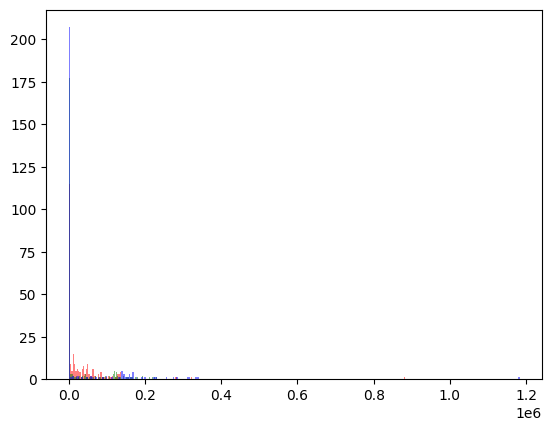

In [8]:
from PIL import Image
import os
import matplotlib.pyplot as plt
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"

# Subdirectories containing images
subdirs = ["glaucoma_project", "healthy"]

# Collect all image file paths from both subdirectories
image_files = []
for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)
    image_files.extend(
        [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    )
image =Image.open(os.path.join(dataset_path,image_files[0]))
red,green,blue, = image.split()
plt.hist(red.histogram(), bins=256, color='red', alpha=0.5)
plt.hist(green.histogram(), bins=256, color='green', alpha=0.5)
plt.hist(blue.histogram(), bins=256, color='blue', alpha=0.5)

plt.show()


In [9]:
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"

# Subdirectories containing images
subdirs = ["glaucoma_project", "healthy"]

# Collect all image file paths from both subdirectories
image_files = []
for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)
    image_files.extend(
        [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    )
print(f"Total images: {len(image_files)}")

Total images: 30


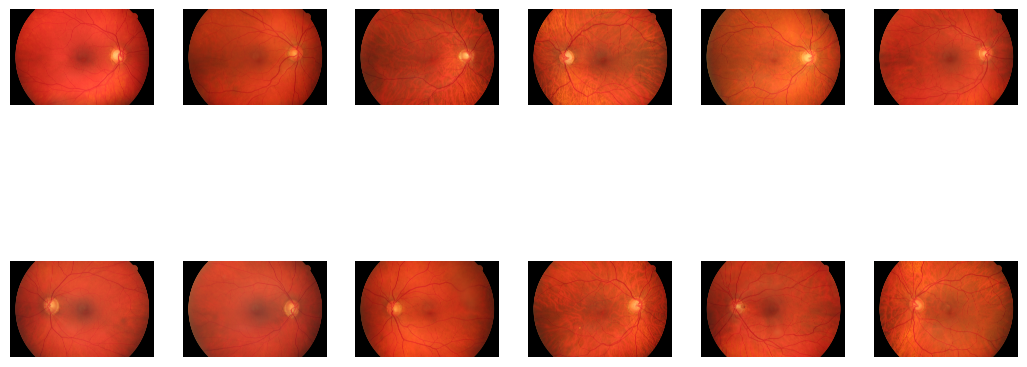

In [10]:
fig, axes = plt.subplots(2,6,figsize=(13,6))
for i, ax in enumerate(axes.flat):
    img= Image.open(os.path.join(dataset_path,image_files[i]))
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [11]:
sizes= [Image.open(os.path.join(dataset_path,f)).size for f in image_files]
unique_sizes = set(sizes)
print (f"Unique image sizes: {unique_sizes}")

Unique image sizes: {(3504, 2336)}


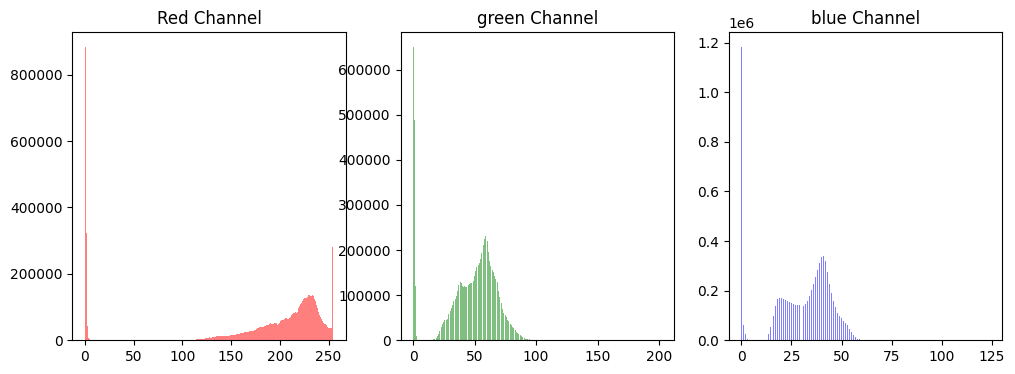

In [12]:
import numpy as np

image =Image.open(os.path.join(dataset_path,image_files[0]))
red,green,blue = image.split()

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(np.array(red).ravel(),bins=256, color='red', alpha=0.5)
plt.title('Red Channel')


plt.subplot(1,3,2)
plt.hist(np.array(green).ravel(),bins=256, color='green', alpha=0.5)
plt.title('green Channel')


plt.subplot(1,3,3)
plt.hist(np.array(blue).ravel(),bins=256, color='blue', alpha=0.5)
plt.title('blue Channel')

plt.show()

In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

corrupted_images = []
for f in image_files:
    try:
        img = Image.open(os.path.join(dataset_path,f))
        img.verify()
    except Exception as e:
        corrupted_images.append(f)
        print(f"Corrupted image: {f}, Error: {e}")

print(f"Total corrupted images:{len(corrupted_images)}")

Total corrupted images:0


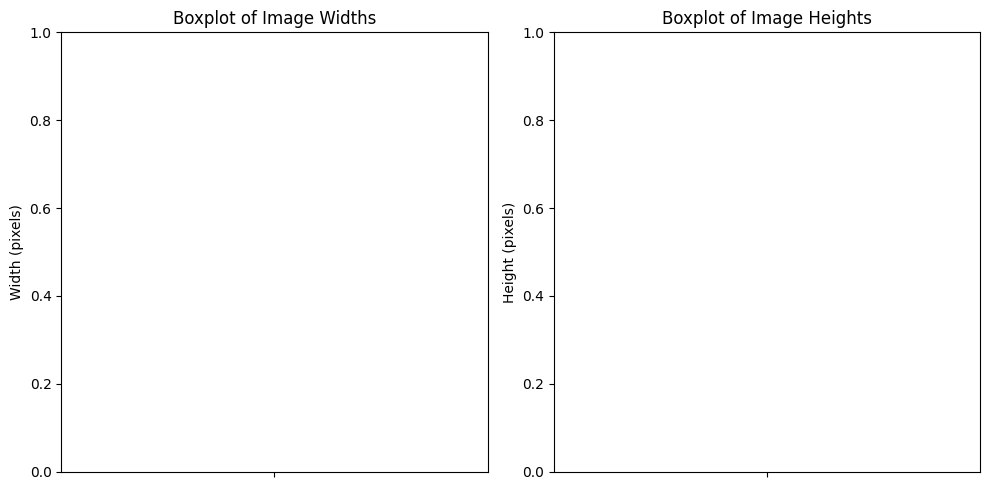

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define dataset path
dataset_path= "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
# Get all image file paths
image_files = [ f for f in os.listdir(dataset_path) if f.endswith(('.jpg','.png'))]

# Lists to store image dimensions
widths = []
heights = []

# Loop through images and get their dimensions
for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    with Image.open(img_path) as img:
        widths.append(img.width)
        heights.append(img.height)

# Create a figure for boxplots
plt.figure(figsize=(10, 5))

# Boxplot for image widths
plt.subplot(1, 2, 1)
sns.boxplot(y=widths, color="skyblue")
plt.title("Boxplot of Image Widths")
plt.ylabel("Width (pixels)")

# Boxplot for image heights
plt.subplot(1, 2, 2)
sns.boxplot(y=heights, color="lightcoral")
plt.title("Boxplot of Image Heights")
plt.ylabel("Height (pixels)")

# Display the plots
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


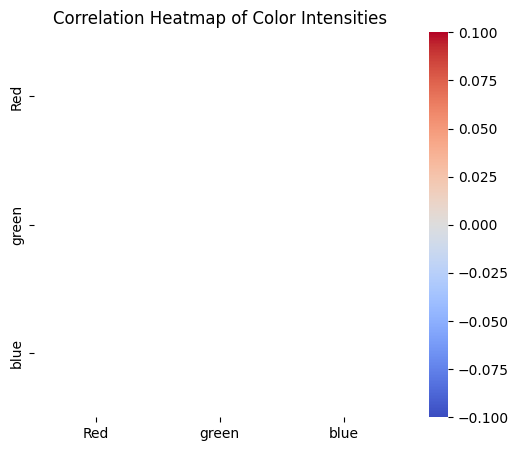

In [15]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

# Define dataset path
dataset_path= "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
image_files = [ f for f in os.listdir(dataset_path) if f.endswith(('.jpg','.png'))]

# Lists to store color intensity values
reds, green, blue = [], [], []

# Loop through images and extract RGB channel means
for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    with Image.open(img_path) as img:
        img = img.convert("RGB")  # Ensure the image is in RGB mode
        img_array = np.array(img)

        # Compute mean intensities for each channel
        reds.append(np.mean(img_array[:, :, 0]))  # Red channel mean
        green.append(np.mean(img_array[:, :, 1]))  # green channel mean
        blue.append(np.mean(img_array[:, :, 2]))  # blue channel mean

# Create a DataFrame for correlation analysis
import pandas as pd
color_data = pd.DataFrame({
    "Red": reds,
    "green": green,
    "blue": blue
})

# Compute correlation matrix
correlation_matrix = color_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Color Intensities")
plt.show()


In [16]:
# T-SNE Visualization of Extracted Features
import cv2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract ORB features from images
orb = cv2.ORB_create(nfeatures=500)
features = []

dataset_path= "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
image_files = [ f for f in os.listdir(dataset_path) if f.endswith(('.jpg','.png'))]
image_files = [os.path.join(dataset_path, f) for f in image_files]


for img_path in image_files[:100]:  # Limit for efficiency
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    keypoints, descriptors = orb.detectAndCompute(img, None)
    if descriptors is not None:
        features.append(descriptors.flatten())

# Ensure all feature vectors have the same length
min_length = min(len(f) for f in features)
features = np.array([f[:min_length] for f in features])

# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Plot PCA-reduced features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1])
plt.title("PCA Visualization of Extracted Features")
plt.show()


ValueError: min() arg is an empty sequence

In [ ]:
# Image Augmentation Samples


import os
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np

# Define augmentation transformations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=30, p=0.5)
])

dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

# Ensure sample_images is defined
if 'sample_images' not in locals():
    sample_images = np.random.choice(image_files, 3, replace=False)

plt.figure(figsize=(12, 6))
for i, img_path in enumerate(sample_images[:3]):
    img_full_path = os.path.join(dataset_path, img_path)  # Construct full path to the image
    img = cv2.imread(img_full_path)
    
    if img is None:
        print(f"Error loading image: {img_full_path}")
        continue
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    augmented = transform(image=img_rgb)['image']

    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Original")

    plt.subplot(2, 3, i+4)
    plt.imshow(augmented)
    plt.axis("off")
    plt.title("Augmented")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

# Load the image (assuming `sample_img` is an image array already)
image_path="/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy_n.jpg"
sample_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale image

if sample_img is None:
    print(f"Error loading image: {image_path}")
else:
    # Create the heatmap
    plt.figure(figsize=(6, 5))
    
    # Use Seaborn's heatmap function to plot the pixel intensities
    sns.heatmap(sample_img, cmap='inferno', cbar=True, square=True, 
                xticklabels=False, yticklabels=False, annot=False)
    
    # Customize the plot
    plt.title("Heatmap of Pixel Intensities", fontsize=16)
    plt.xlabel("Width (Pixels)", fontsize=12)
    plt.ylabel("Height (Pixels)", fontsize=12)
    
    # Display the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2

img_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_contrast, cv2.COLOR_BGR2RGB))
plt.title("Contrast Enhanced Image")
plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2
img_bright = cv2.convertScaleAbs(img, alpha=1.0, beta=50)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB))
plt.title("Brightened Image")
plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2

edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


In [ ]:
#histogram equalization
import matplotlib.pyplot as plt
import cv2

img_eq = cv2.equalizeHist(img_gray)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")
plt.show()


In [ ]:
#image resizing
img_resized = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2))
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")
plt.axis("off")
plt.show()


In [ ]:
import cv2
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Image with Contours")
plt.axis("off")
plt.show()


In [ ]:
from skimage import feature, io, color
import matplotlib.pyplot as plt

# Load the image
img = io.imread("/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/infected_c.jpg")

# Convert to grayscale
img_gray = color.rgb2gray(img)

# Compute the saliency map
saliency_map = feature.canny(img_gray)

# Visualize the saliency map
plt.imshow(saliency_map, cmap='hot')
plt.title("Saliency Map (Canny Edge Detection)")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import os

dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]


# Load an image and calculate histograms for multiple images
plt.figure(figsize=(12, 6))
for i, img_path in enumerate(image_files[:5]):  # Use first 5 images for example
    img = cv2.imread(os.path.join(dataset_path, img_path))
    colors = ('b', 'g', 'r')
    
    for j, color in enumerate(colors):
        hist = cv2.calcHist([img], [j], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f"RGB Histogram for Image {i+1}")
    plt.show()


In [ ]:
# image rotation visualization
import cv2
img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis("off")
plt.show()


In [ ]:
# . Blurring and Edge Detection Comparison
import cv2
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(img, 100, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")
plt.show()


In [ ]:

#Image Thresholding
import cv2
# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
_, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Apply adaptive threshold
thresh2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Visualize the thresholded images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(thresh1, cmap='gray')
plt.title("Binary Threshold")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(thresh2, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis("off")
plt.show()


In [ ]:
#Histogram of Oriented Gradients (HOG)
from skimage.feature import hog
from skimage import exposure
import cv2
import matplotlib.pyplot as plt

# Load your image
img = cv2.imread("/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/infected_c.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute HOG features
fd, hog_image = hog(img_gray, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

# Rescale HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the rescaled HOG image
plt.figure(figsize=(8, 4))
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("Histogram of Oriented Gradients (HOG)")
plt.axis("off")
plt.show()



In [17]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
healthy_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy"
glaucoma_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/glaucoma_project"

# Image settings
IMG_SIZE = 224  # Resize images to 224x224

# Prepare data storage
X = []  # Image data
y = []  # Labels (0 = Healthy, 1 = Glaucoma)

# Load healthy images
for img_name in os.listdir(healthy_path):
    img = cv2.imread(os.path.join(healthy_path, img_name))
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize
    X.append(img)
    y.append(0)  # Label for healthy

# Load glaucoma-infected images
for img_name in os.listdir(glaucoma_path):
    img = cv2.imread(os.path.join(glaucoma_path, img_name))
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    X.append(img)
    y.append(1)  # Label for glaucoma

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total images: {len(X)}, Training: {len(X_train)}, Testing: {len(X_test)}")


Total images: 30, Training: 24, Testing: 6


In [18]:
#LOGISTIC REGRESSION MODEL
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
healthy_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy"
glaucoma_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/glaucoma_project"

# Image settings
IMG_SIZE = 224  # Resize images to 224x224

# Prepare data storage
X = []  # Image data
y = []  # Labels (0 = Healthy, 1 = Glaucoma)

# Load healthy images
for img_name in os.listdir(healthy_path):
    img = cv2.imread(os.path.join(healthy_path, img_name))
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize
    X.append(img)
    y.append(0)  # Label for healthy

# Load glaucoma-infected images
for img_name in os.listdir(glaucoma_path):
    img = cv2.imread(os.path.join(glaucoma_path, img_name))
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    X.append(img)
    y.append(1)  # Label for glaucoma

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total images: {len(X)}, Training: {len(X_train)}, Testing: {len(X_test)}")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Flatten images for logistic regression (convert 2D to 1D)
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_flat, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Logistic Regression
log_cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion Matrix:\n", log_cm)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))


print(f"Baseline Model (Logistic Regression) Accuracy: {accuracy:.2f}")


Total images: 30, Training: 24, Testing: 6
Logistic Regression Confusion Matrix:
 [[2 0]
 [2 2]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

Baseline Model (Logistic Regression) Accuracy: 0.67


In [19]:
#RANDOM FOREST MODEL
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
healthy_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy"
glaucoma_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/glaucoma_project"

# Image settings
IMG_SIZE = 224  # Resize images to 224x224

# Prepare data storage
X = []  # Image data
y = []  # Labels (0 = Healthy, 1 = Glaucoma)

# Load healthy images
for img_name in os.listdir(healthy_path):
    img = cv2.imread(os.path.join(healthy_path, img_name))
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize
    X.append(img)
    y.append(0)  # Label for healthy

# Load glaucoma-infected images
for img_name in os.listdir(glaucoma_path):
    img = cv2.imread(os.path.join(glaucoma_path, img_name))
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    X.append(img)
    y.append(1)  # Label for glaucoma

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total images: {len(X)}, Training: {len(X_train)}, Testing: {len(X_test)}")


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X (features) and y (labels) are defined properly
# X = Your feature data (e.g., image data)
# y = Your labels (Healthy/Glaucoma)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten the images (if applicable) for the Random Forest model
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_flat)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print(f"Baseline Model (Random Forest) Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix and Classification Report
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Total images: 30, Training: 24, Testing: 6
Baseline Model (Random Forest) Accuracy: 0.67

Random Forest Confusion Matrix:
 [[2 0]
 [2 2]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step - accuracy: 0.5518 - loss: 0.6959 - val_accuracy: 0.3333 - val_loss: 4.5571 - learning_rate: 0.0010
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.5292 - loss: 0.7011 - val_accuracy: 0.3333 - val_loss: 3.7897 - learning_rate: 0.0010
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.6321 - loss: 0.6877 - val_accuracy: 0.3333 - val_loss: 3.4369 - learning_rate: 0.0010
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.6202 - loss: 0.6848 - val_accuracy: 0.3333 - val_loss: 2.9640 - learning_rate: 0.0010
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - accuracy: 0.4929 - loss: 0.6852 - val_accuracy: 0.3333 - val_loss: 2.7306 - learning_rate: 0.0010
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - accuracy: 0.6161 - loss: 0.6797 - val_accuracy: 0.3333 - val_loss: 2.6592 - learning_rate: 0.0010
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 0.6006 - loss: 0.6955 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


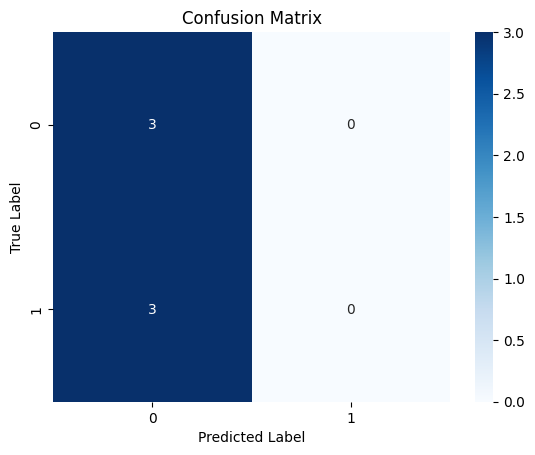

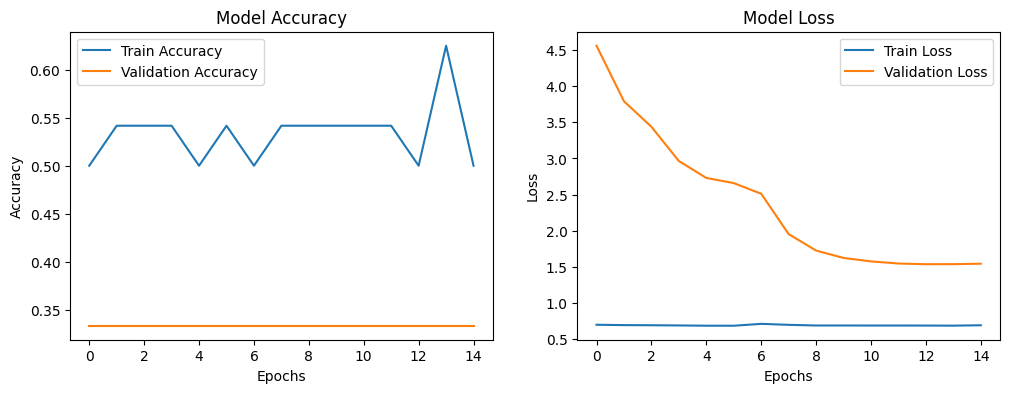

In [34]:
#CNN MODEL
import os
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Set image size
IMG_SIZE = 224

# Define paths
healthy_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/healthy"
glaucoma_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined/glaucoma_project"

# Initialize data lists
X = []
y = []

# Load healthy images (Label = 0)
for img_name in os.listdir(healthy_path):
    img_path = os.path.join(healthy_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:  # Check if image is valid
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Normalize
        X.append(img)
        y.append(0)  # Label for healthy

# Load glaucoma-infected images (Label = 1)
for img_name in os.listdir(glaucoma_path):
    img_path = os.path.join(glaucoma_path, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
        X.append(img)
        y.append(1)  # Label for glaucoma

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation to artificially increase dataset size
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    rotation_range=30,        # Random rotation
    width_shift_range=0.2,    # Horizontal shift
    height_shift_range=0.2,   # Vertical shift
    shear_range=0.2,          # Shearing
    zoom_range=0.2,           # Zooming
    horizontal_flip=True,     # Flipping images
    fill_mode='nearest'       # Fill in missing pixels
)

# CNN model
model = Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # Define input shape separately

    # First Convolutional Layer
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolutional Layer
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    # Third Convolutional Layer
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Prevent overfitting
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Choose optimizer (You can switch between 'adam' and 'rmsprop')
optimizer = Adam(learning_rate=0.001)  # You can change to RMSprop(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# ReduceLROnPlateau - Automatically adjusts learning rate if model stops improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=4),  # Apply data augmentation
    validation_data=(X_test, y_test),
    epochs=15,  # Increased from default (Try adjusting)
    callbacks=[lr_reduction],  # Reduce learning rate when necessary
    verbose=1
)

# CNN Model - ensure this part gets defined after training the CNN model
predicted_classes_cnn = model.predict(X_test)  # Replace cnn_model with your actual CNN model variable
predicted_classes_cnn = np.argmax(predicted_classes_cnn, axis=1)  # In case of multi-class classification, use argmax

cnn_accuracy = accuracy_score(y_test, predicted_classes_cnn)  # Now using the defined predicted_classes_cnn
cnn_report = classification_report(y_test, predicted_classes_cnn, output_dict=True)
cnn_precision = cnn_report['accuracy']
cnn_recall = cnn_report['macro avg']['recall']
cnn_f1 = cnn_report['macro avg']['f1-score']

# Add the results to the list
results.append({
    "Model": "CNN",
    "Accuracy": cnn_accuracy,
    "Precision": cnn_precision,
    "Recall": cnn_recall,
    "F1-Score": cnn_f1
})


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot training accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()



In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mujawar/efficientnetb0-notop-h5")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/efficientnetb0-notop-h5


Found 24 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.3646 - loss: 0.7926 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4844 - loss: 0.7229 - val_accuracy: 0.5000 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5729 - loss: 0.7082 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6562 - loss: 0.6667 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6823 - loss: 0.6140 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 2.0000e-05
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5885 - loss: 0.6479 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 2.0000e-05
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7031 - loss: 0.6165 - val_accuracy: 0.5000 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


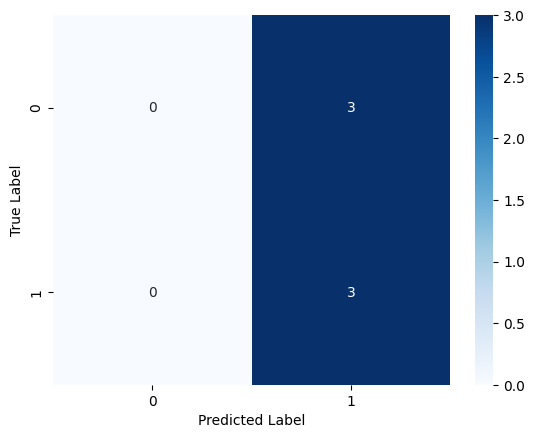

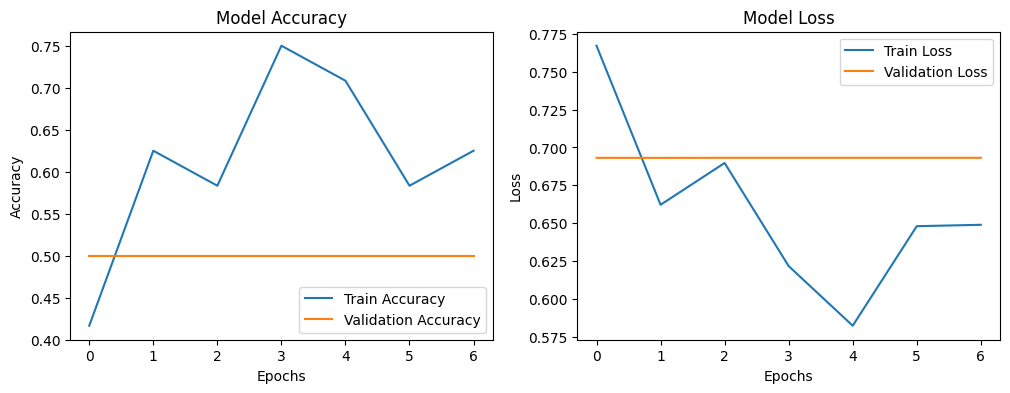

Found 24 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/17


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step - accuracy: 0.5000 - loss: 1.0199 - val_accuracy: 0.5000 - val_loss: 1.0766 - learning_rate: 1.0000e-04
Epoch 2/17
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.8494 - val_accuracy: 0.5000 - val_loss: 0.8927 - learning_rate: 1.0000e-04
Epoch 3/17
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5417 - loss: 0.7808 - val_accuracy: 0.5000 - val_loss: 0.7321 - learning_rate: 1.0000e-04
Epoch 4/17
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5833 - loss: 0.6692 - val_accuracy: 0.5000 - val_loss: 0.8957 - learning_rate: 1.0000e-04
Epoch 5/17
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 0.5764 - val_accuracy: 0.5000 - val_loss: 0.8856 - learning_rate: 1.0000e-04
Epoch 6/17
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7500 - loss: 0.4889 - val_accuracy: 0.5000 - val_loss: 0.7475 - learning_rate: 1.0000e-04
Epoch 7/17
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 0.5720 - val_accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


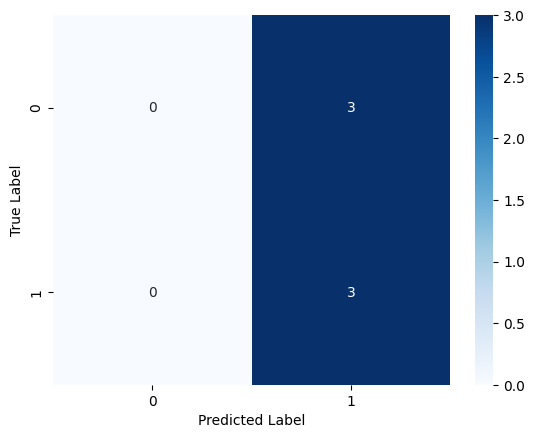

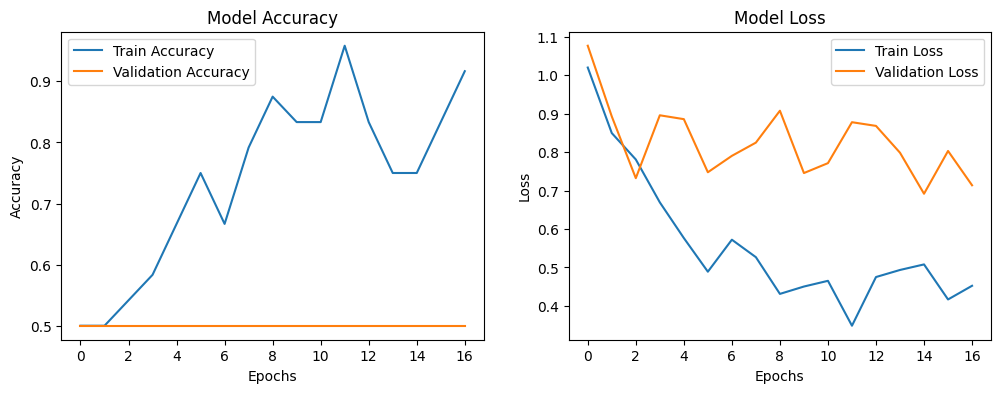

In [36]:
#MOBILENETV2 MODEL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers, callbacks

# Define paths
data_dir = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"

# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load Training and Validation Data
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load MobileNetV2 Pre-trained Model
base_model = MobileNetV2(weights="/kaggle/input/mobilenet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5",
                                 include_top=False, input_shape=(224, 224, 3))


# Build Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification (Healthy vs Glaucoma)
])

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks (Early Stopping & Reduce LR on Plateau)

reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=17,
    callbacks=[reduce_lr]
)

# Save Model
model.save("mobilenetv2_glaucoma_model.keras")

print("Training completed and model saved!")

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the validation set
predictions = model.predict(val_data)  # Using validation set for predictions

# Convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype("int32")  # Threshold at 0.5 for binary classification

# Assuming val_data has the true labels as well
true_labels = val_data.classes

cm = confusion_matrix(true_labels, predicted_classes)
print("Confusion Matrix:\n", cm)
report = classification_report(true_labels, predicted_classes, target_names=['Healthy', 'Glaucoma'])
print("Classification Report:\n", report)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
#DENSENET121
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image

# Define paths
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
batch_size = 16  # Adjust based on Kaggle memory limits
img_size = (224, 224)  # Resize images for DenseNet

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting into training and validation
)

# Load training images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the correct path to your local weights file
weights_path = "/kaggle/input/dense121/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Load DenseNet121 model without the top layers (for feature extraction)
base_model = tf.keras.applications.DenseNet121(
    include_top=False,  # Remove the fully connected layers
    input_shape=(224, 224, 3),  # Adjust the input shape if needed
    weights=None  # Do not fetch from the internet
)

# Load the weights from the local file
base_model.load_weights(weights_path)

# Set the base model to not trainable (freeze it)
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Pooling layer to flatten the output
x = tf.keras.layers.Dense(1024, activation='relu')(x)  # Fully connected layer
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout layer to reduce overfitting
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # 1 class: healthy or glaucoma (binary classification)

# Final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with binary_crossentropy loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=15,  # Set the number of epochs for training
    validation_data=val_generator,
    verbose=1
)



Found 24 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.4444 - loss: 11.1376 - val_accuracy: 0.8333 - val_loss: 10.7133 - learning_rate: 1.0000e-04
Epoch 2/13
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4167 - loss: 10.8393 - val_accuracy: 0.5000 - val_loss: 10.7674 - learning_rate: 1.0000e-04
Epoch 3/13
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5417 - loss: 10.8689 - val_accuracy: 0.6667 - val_loss: 10.5583 - learning_rate: 1.0000e-04
Epoch 4/13
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6458 - loss: 10.7303 - val_accuracy: 0.5000 - val_loss: 10.5236 - learning_rate: 1.0000e-04
Epoch 5/13
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3194 - loss: 10.8230 - val_accuracy: 0.3333 - val_loss: 10.5423 - learning_rate: 1.0000e-04
Epoch 6/13
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7708 - loss: 10.3416 - val_accuracy: 0.6667 - val_loss: 10.4072 - learning_rate: 1.0000e-04
Epoch 7/13
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6736 - loss: 10.4935 - val_accu

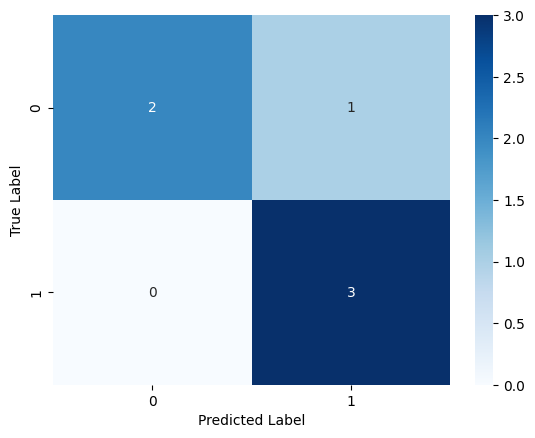

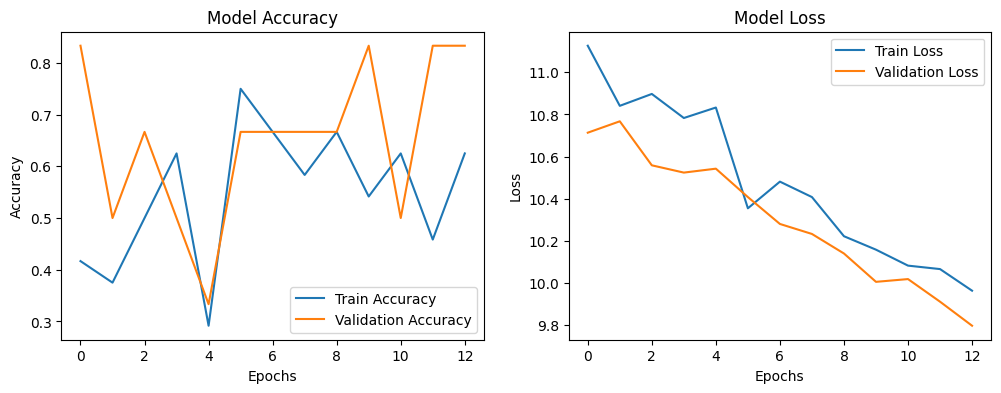

In [25]:
#ADJUSTING DENSENET121 THROUGH
# 1.DATA AUGUMENTATION AND L2 REGULARIZATION
# 2.DROPOUT
# 3.LEARNING RATE REDUCTION AND EARLY STOPPING


import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from PIL import Image

# Define paths
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
batch_size = 16  # Adjust based on Kaggle memory limits
img_size = (224, 224)  # Resize images for DenseNet

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting into training and validation
)

# Load training images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the correct path to your local weights file
weights_path = "/kaggle/input/dense121/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Load DenseNet121 model without the top layers (for feature extraction)
base_model = tf.keras.applications.DenseNet121(
    include_top=False,  # Remove the fully connected layers
    input_shape=(224, 224, 3),  # Adjust the input shape if needed
    weights=None  # Do not fetch from the internet
)

# Load the weights from the local file
base_model.load_weights(weights_path)

# Set the base model to not trainable (freeze it)
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Pooling layer to flatten the output
x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # L2 Regularization
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout layer to reduce overfitting
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # 1 class: healthy or glaucoma (binary classification)

# Final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with binary_crossentropy loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=13,  # Set the number of epochs for training
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]  # Use EarlyStopping and Learning Rate Reduction
)
# Make predictions on the validation set
predictions = model.predict(val_generator)  # Using validation set for predictions

# Convert probabilities to class labels (threshold at 0.5 for binary classification)
predicted_classes = (predictions > 0.5).astype("int32")

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming val_generator has the true labels as well
true_labels = val_generator.classes

cm = confusion_matrix(true_labels, predicted_classes)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
report = classification_report(true_labels, predicted_classes, target_names=['Healthy', 'Glaucoma'])
print("Classification Report:\n", report)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()




In [26]:
#RESNET MODEL
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from PIL import Image

# Define paths
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
batch_size = 16  # Adjust based on Kaggle memory limits
img_size = (224, 224)  # Resize images for ResNet

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting into training and validation
)

# Load training images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the correct path to your local weights file
weights_path = "/kaggle/input/resnet2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"




# Load the weights from the local file
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224, 224, 3),
    weights=None  # Do not fetch from the internet
)

# Load the weights from the local file
base_model.load_weights(weights_path)



# Set the base model to not trainable (freeze it)
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Pooling layer to flatten the output
x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # L2 Regularization
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout layer to reduce overfitting
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # 1 class: healthy or glaucoma (binary classification)

# Final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model with binary_crossentropy loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=15,  # Set the number of epochs for training
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]  # Use EarlyStopping and Learning Rate Reduction
)


Found 24 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.4236 - loss: 14.5081 - val_accuracy: 0.5000 - val_loss: 14.1833 - learning_rate: 1.0000e-04
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5139 - loss: 14.1458 - val_accuracy: 0.5000 - val_loss: 14.0009 - learning_rate: 1.0000e-04
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5000 - loss: 14.0660 - val_accuracy: 0.5000 - val_loss: 13.8348 - learning_rate: 1.0000e-04
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5694 - loss: 13.7910 - val_accuracy: 0.5000 - val_loss: 13.6724 - learning_rate: 1.0000e-04
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4722 - loss: 13.7273 - val_accuracy: 0.5000 - val_loss: 13.5027 - learning_rate: 1.0000e-04
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4028 - loss: 13.6351 - val_accuracy: 0.5000 - val_loss: 13.3294 - learning_rate: 1.0000e-04
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5000 - loss: 13.4453 - val_accu

Found 24 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 55s 10s/step - accuracy: 0.5278 - loss: 0.7505 - val_accuracy: 0.5000 - val_loss: 0.7580 - learning_rate: 1.0000e-05
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step - accuracy: 0.5972 - loss: 0.6302 - val_accuracy: 0.5000 - val_loss: 0.7513 - learning_rate: 1.0000e-05
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.4028 - loss: 0.8398 - val_accuracy: 0.5000 - val_loss: 0.7516 - learning_rate: 1.0000e-05
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5833 - loss: 0.7093 - val_accuracy: 0.5000 - val_loss: 0.7458 - learning_rate: 1.0000e-05
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5764 - loss: 0.7083 - val_accuracy: 0.5000 - val_loss: 0.7470 - learning_rate: 1.0000e-05
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5764 - loss: 0.7118 - val_accuracy: 0.5000 - val_loss: 0.7448 - learning_rate: 5.0000e-06
Epoch 7/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


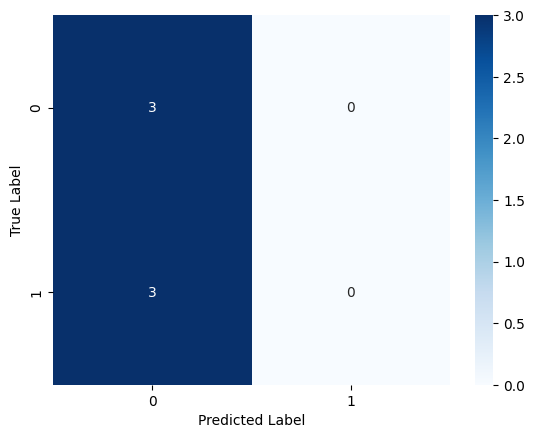

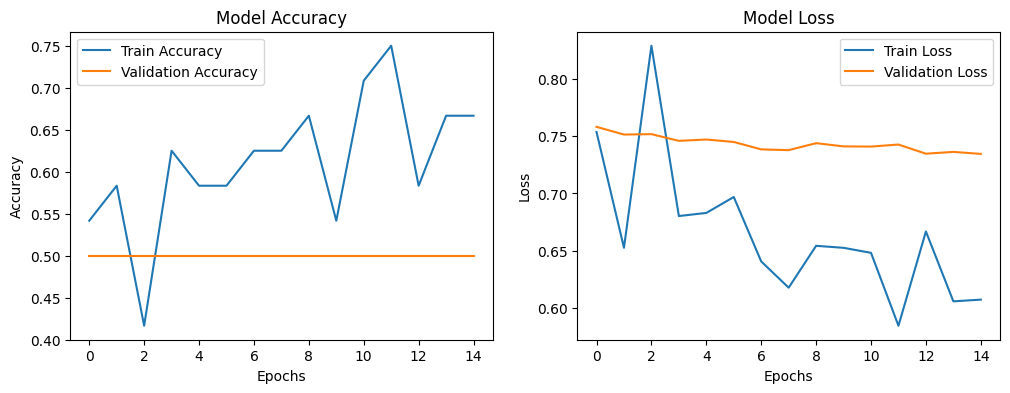

In [27]:
##### RESNET MODEL WITH ADJUSTMENTS
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from PIL import Image

# Define paths
dataset_path = "/kaggle/input/glaucomadataset-healthy-and-infected-images/datasets combined"
batch_size = 16  # Adjust based on Kaggle memory limits
img_size = (224, 224)  # Resize images for ResNet

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting into training and validation
)

# Load training images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Load validation images
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Define the path to your local ResNet50 weights
weights_path = "/kaggle/input/resnet2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Load ResNet50 model without the top layers (for feature extraction)
base_model = tf.keras.applications.ResNet50(
    include_top=False,  # Remove the fully connected layers
    input_shape=(224, 224, 3),  # Adjust the input shape if needed
    weights=None  # Do not fetch from the internet
)

# Load the weights from the local file
base_model.load_weights(weights_path)

# Unfreeze the last few layers of the model for fine-tuning
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Add custom layers on top of the base model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Pooling layer to flatten the output
x = tf.keras.layers.Dense(1024, activation='relu')(x)  # Fully connected layer
x = tf.keras.layers.Dropout(0.5)(x)  # Dropout layer to reduce overfitting
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # 1 class: healthy or glaucoma (binary classification)
optimizer = Adam(learning_rate=0.001) 
# Final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Define callbacks for early stopping and learning rate reduction

lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, min_lr=1e-6)

# Re-compile the model after making changes
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=15,  # Set the number of epochs for training
    validation_data=val_generator,
    verbose=1,
    callbacks=[lr_scheduler]
)
# Make predictions on the validation set
predictions = model.predict(val_generator)  # Using validation set for predictions

# Convert probabilities to class labels (threshold at 0.5 for binary classification)
predicted_classes = (predictions > 0.5).astype("int32")

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming val_generator has the true labels as well
true_labels = val_generator.classes

cm = confusion_matrix(true_labels, predicted_classes)
print("confusion matrix:\n", cm)
report = classification_report(true_labels, predicted_classes, target_names=['Healthy', 'Glaucoma'])
print("Classification Report:\n", report)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()
